# Importing the required libraries

In [5]:
## Python
import os
import random
import sys
import warnings
warnings.filterwarnings('ignore')


## Package
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

import sklearn

# Importing datasets & Labels

In [2]:
Ravdess_paths= np.array(("E:/NYU_Classes/Project/Ravdess_Audio_Speech_Actors_01-24/","E:/NYU_Classes/Project/Ravdess_Audio_Song_Actors_01-24/"))
dir_list = os.listdir(Ravdess_paths[0])
dir_list.sort()
print (dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [4]:
# Create DataFrame for Data intel
ravdess_db = pd.DataFrame(columns=['path','source','actor', 'gender', 'emotion','emotion_lb'])
count = 0
for data_path in Ravdess_paths:
    dir_list = os.listdir(data_path)
    dir_list.sort()
    for i in dir_list:
        file_list = os.listdir(data_path + i)
        for f in file_list:
            nm = f.split('.')[0].split('-')
            path = data_path + i + '/' + f
            src = int(nm[1])
            actor = int(nm[-1])
            emotion = int(nm[2])
            source = "Ravdess"

            if int(actor)%2 == 0:
                gender = "female"
            else:
                gender = "male"

            if nm[3] == '01':
                intensity = 0
            else:
                intensity = 1

            if nm[4] == '01':
                statement = 0
            else:
                statement = 1

            if nm[5] == '01':
                repeat = 0
            else:
                repeat = 1

            if emotion == 1:
                lb = "neutral"
            elif emotion == 2:
                lb = "calm"
            elif emotion == 3:
                lb = "happy"
            elif emotion == 4:
                lb = "sad"
            elif emotion == 5:
                lb = "angry"
            elif emotion == 6:
                lb = "fearful"
            elif emotion == 7:
                lb = "disgust"
            elif emotion == 8:
                lb = "surprised"
            else:
                lb = "none"

            ravdess_db.loc[count] = [path,source,actor, gender, emotion,lb]
            count += 1

In [10]:
print (len(ravdess_db))

2452


In [11]:
ravdess_db.sort_values(by='path',inplace=True)
ravdess_db.index =  range(len(ravdess_db.index))
ravdess_db.head()

path   source actor gender  \
0  E:/NYU_Classes/Project/Ravdess_Audio_Song_Acto...  Ravdess     1   male   
1  E:/NYU_Classes/Project/Ravdess_Audio_Song_Acto...  Ravdess     1   male   
2  E:/NYU_Classes/Project/Ravdess_Audio_Song_Acto...  Ravdess     1   male   
3  E:/NYU_Classes/Project/Ravdess_Audio_Song_Acto...  Ravdess     1   male   
4  E:/NYU_Classes/Project/Ravdess_Audio_Song_Acto...  Ravdess     1   male   

  emotion emotion_lb  
0       1    neutral  
1       1    neutral  
2       1    neutral  
3       1    neutral  
4       2       calm

# Plotting the audio file's waveform and its spectrogram

In [13]:
#sampling rate(sr) = 44100 ( which is the standard sr for high quality audio)
sampling_rate = 44100

In [15]:
filename = ravdess_db.path[0]
print (filename)

E:/NYU_Classes/Project/Ravdess_Audio_Song_Actors_01-24/Actor_01/03-02-01-01-01-01-01.wav


In [44]:
samples, sample_rate = librosa.load(filename, res_type='kaiser_fast',sr=sampling_rate)
sample_rate, samples.shape


(44100, (186878,))

In [45]:
ipd.Audio(samples,rate=sample_rate)

#### Spectogram 


In [26]:
def log_specgram(audio, sample_rate, window_size=20,step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)


Text(0.5, 0, 'Seconds')

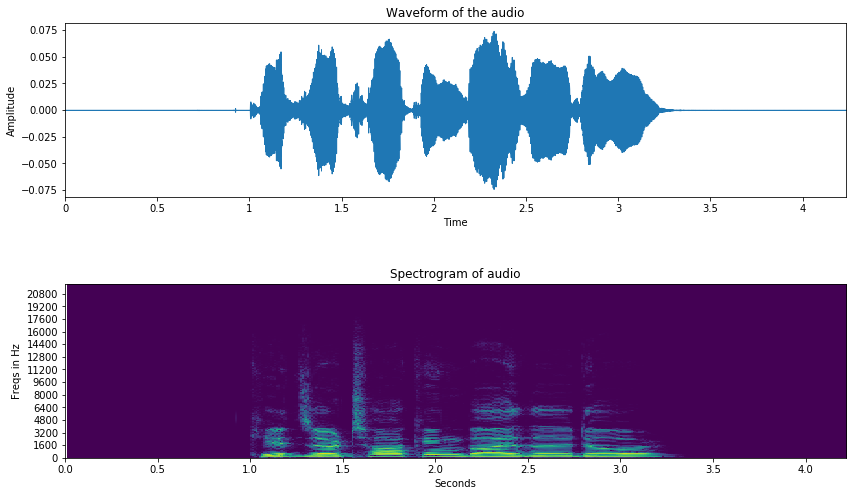

In [69]:
# Plotting Wave Form and Spectrogram
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Waveform of the audio')
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples, sr=sample_rate)
fig.subplots_adjust(hspace=.5)
ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::32])
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(0.0, end, 0.5))
ax2.set_title('Spectrogram of audio')
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

## Trim the Audio 

In [64]:
samples_trim, index = librosa.effects.trim(samples,top_db=25)
samples_trim.shape, index

((96256,), array([ 46080, 142336]))

In [65]:
ipd.Audio(samples_trim,rate=sample_rate)

In [66]:
Difference_in_length = len(samples)-len(samples_trim)
Difference_in_length

90622

In [67]:
Difference_in_duration = librosa.get_duration(samples)-librosa.get_duration(samples_trim)
Difference_in_duration

4.10984126984127

Text(0.5, 0, 'Seconds')

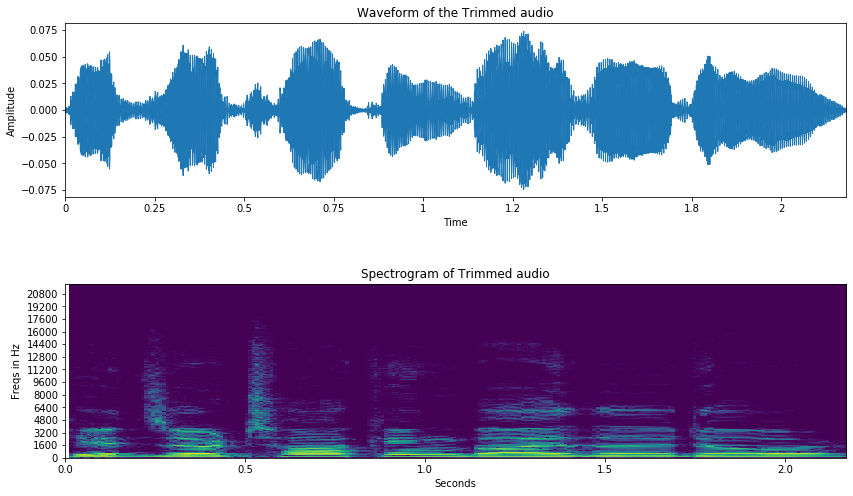

In [70]:
# Plotting Wave Form and Spectrogram
freqs, times, spectrogram = log_specgram(samples_trim, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Waveform of the Trimmed audio')
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples_trim, sr=sample_rate)
fig.subplots_adjust(hspace=.5)
ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::32])
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(0.0, end, 0.5))
ax2.set_title('Spectrogram of Trimmed audio')
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

### Wiener Filter to remove Noise

In [72]:
sample_weiner = scipy.signal.wiener(samples_trim)
len(sample_weiner)

96256

In [73]:
ipd.Audio(sample_weiner,rate=sample_rate)

In [74]:
Diff_noise = sample_weiner-samples_trim
ipd.Audio(Diff_noise,rate=sample_rate)

Text(0.5, 0, 'Seconds')

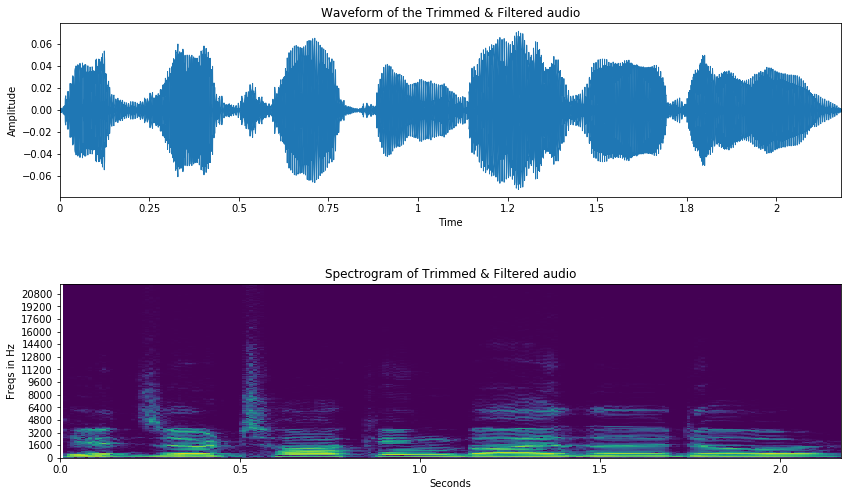

In [76]:
# Plotting Wave Form and Spectrogram
freqs, times, spectrogram = log_specgram(sample_weiner, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Waveform of the Trimmed & Filtered audio')
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(sample_weiner, sr=sample_rate)
fig.subplots_adjust(hspace=.5)
ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::32])
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(0.0, end, 0.5))
ax2.set_title('Spectrogram of Trimmed & Filtered audio')
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

### Frequency-based features

#### Mel Power Spectrogram

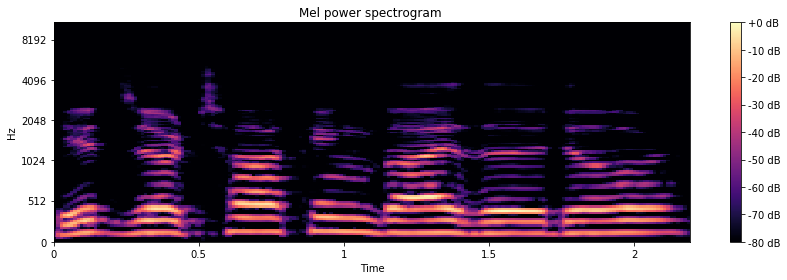

In [79]:
# Plotting Mel Power Spectrogram
S_sample = librosa.feature.melspectrogram(sample_weiner, sr=sample_rate, n_mels=128,n_fft=2048,hop_length=512)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S_sample = librosa.amplitude_to_db(S_sample, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S_sample, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()